<a href="https://colab.research.google.com/github/thejasrao262003/Understanding-Machine-Learning-Algorithims/blob/main/EDA/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values
print(X[0])
print(Y)

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0, strategy='mean')
imputer.fit(X[:,1:6])
X[:,1:6] = imputer.transform(X[:,1:6])
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [42]:
from sklearn.preprocessing import StandardScaler
Y = Y.reshape(len(Y),1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [43]:
print(X)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [44]:
print(Y)

[[ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [ 1.36589591]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [-0.73212021]
 [ 1.36589591]
 [-0.73212021]
 [ 1.36589

PLOTTING PREGNANCY DATA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


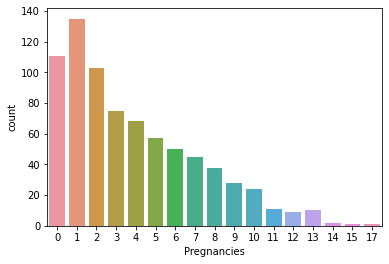

In [45]:
sns.countplot(data['Pregnancies'])

#Knowing the Datatypes

In [46]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#Dividing data

In [47]:
import matplotlib.pyplot as plt

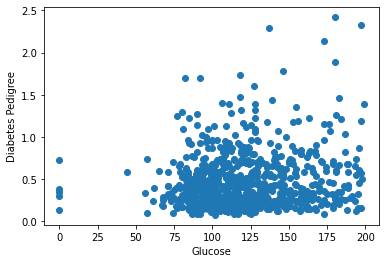

In [48]:
plt.scatter(data['Glucose'], data['DiabetesPedigreeFunction'])
plt.xlabel("Glucose")
plt.ylabel("Diabetes Pedigree")
plt.show()

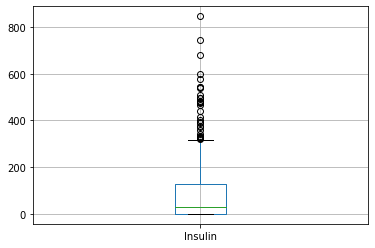

In [49]:
data[['Insulin']].boxplot()

In [50]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


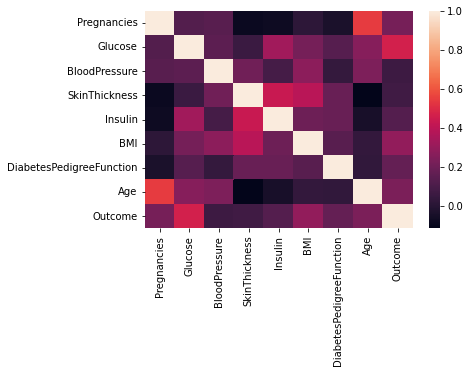

In [51]:
sns.heatmap(data.corr())